<a href="https://colab.research.google.com/github/andredss23/Projetos_Python/blob/main/An%C3%A1lise%20Dataset%20-%20German%20Credit%20Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/german_credit_data_target_phyton.csv", index_col=0, parse_dates=None)

# Contexto

Esse projeto utiliza os dados do Kaggle do German Credit Risk (https://www.kaggle.com/code/lesleyding/german-credit-risk-analysis-and-modeling/notebook). O conjunto contém 1000 clientes que apresetam 9 variáveis. Nesse conjunto de dados, cada entrada representa um indivíduo que recebeu um crédito de um banco e é classificada como risco de crédito bom ou ruim de acordo com o conjunto de atributos. 

Dessa forma, o objetivo desse projeto é realizar uma exploração do dataset e aplicar o método de regressão logística para analisar qual é o melhor parâmetro para se utilizar em um dataset com classes desabalanceadas.

# Análise Exploratória de Dados / EDA

In [ ]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
cr.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

**Descrição variáveis**

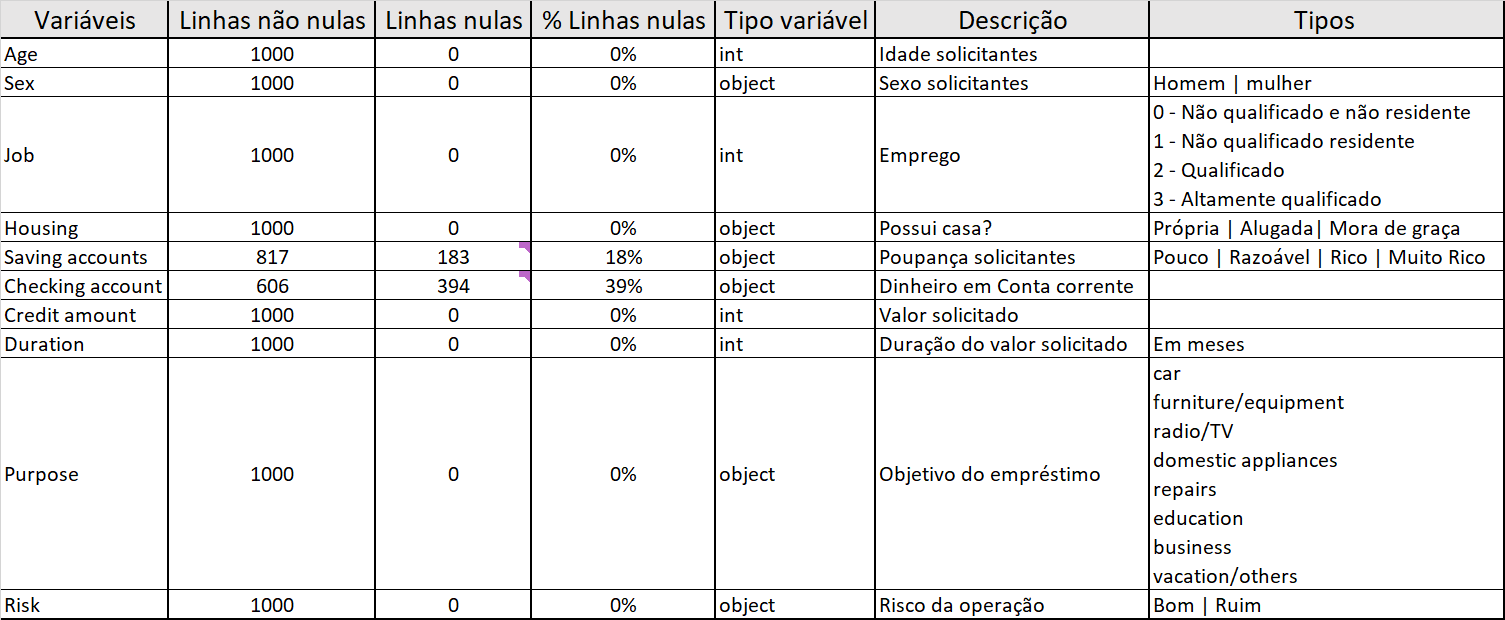

* Variáveis "Savgin accounts" e "Checking account" são as **únicas** que possuem valores nulos.

In [ ]:
cr.nunique().sort_values()

Sex                   2
Risk                  2
Housing               3
Checking account      3
Job                   4
Saving accounts       4
Purpose               8
Duration             33
Age                  53
Credit amount       921
dtype: int64

In [ ]:
cr.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


Vamos observar a quantidade das variáveis discretas (*exeto a variável Age*): **Risk, Sex, Housing, Checking account, Job, Saving accounts, Purpose e Age.** 


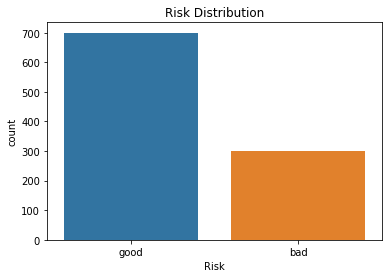

In [ ]:
sns.countplot(x='Risk', data=cr).set_title('Risk Distribution');

*   Good Risk é predominante.

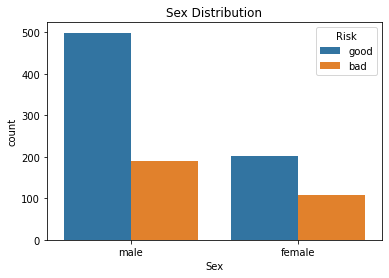

In [ ]:
sns.countplot(x='Sex', hue='Risk', data=cr).set_title('Sex Distribution');



*   Good Risk é mais predominante no sexo masculino em comparação ao feminino no dataset.

*   Implementar a variável "Sex" em um modelo de predição pode enviserar o modelo, pois quantidade de homens com good risk é muito superior a quantide de good risk das mulheres.






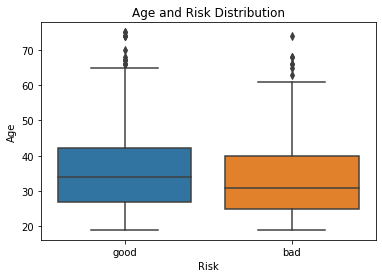

In [ ]:
sns.boxplot(x="Risk", y="Age", data=cr).set_title("Age and Risk Distribution");

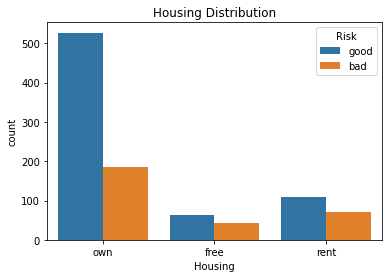

In [ ]:
sns.countplot(x='Housing', hue='Risk', data=cr).set_title('Housing Distribution');

*   Good Risk é prodominante nos clientes com casa própria.

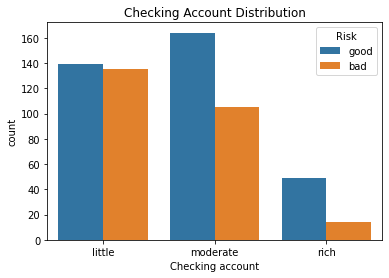

In [ ]:
sns.countplot(x='Checking account', hue='Risk', data=cr).set_title('Checking Account Distribution');



*   Good/Bad Risk é equilibrado em pouco dinhheiro em conta corrente.
*   Good Risk é predominante em muito e moderado dinheiro em conta. 



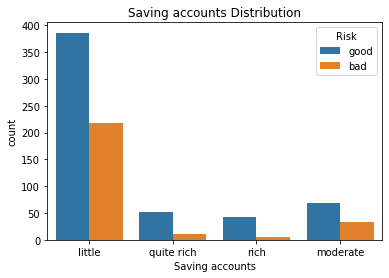

In [ ]:
sns.countplot(x='Saving accounts', hue='Risk', data=cr).set_title('Saving accounts Distribution');



*   Good Risk predominante em todos.



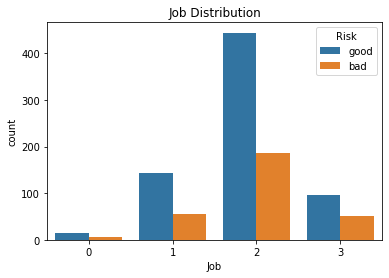

In [ ]:
sns.countplot(x='Job', hue='Risk', data=cr).set_title('Job Distribution');



*   Good Risk é muito predominante em solicitantes qualificados.



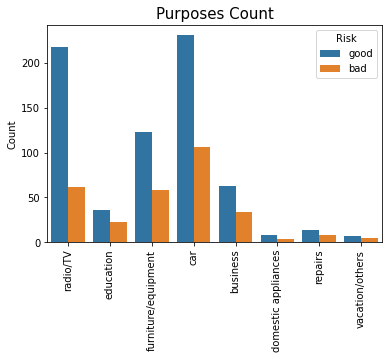

In [ ]:
g = sns.countplot(x='Purpose', hue='Risk', data=cr);
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("", fontsize=5)
g.set_ylabel("Count", fontsize=10)
g.set_title("Purposes Count", fontsize=15);

*   Os principais motivos de empréstimo são radio/TV, furniture/equipament e car.



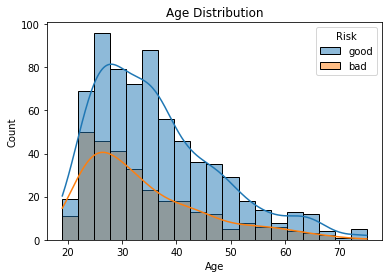

In [ ]:
sns.histplot(data=cr, x="Age", hue="Risk", kde=True).set_title('Age Distribution');



*   Idade não tem grande efeito sobre o risco, dado que tendencias de distribuição do risco bom e ruim se comportam de maneira similar.



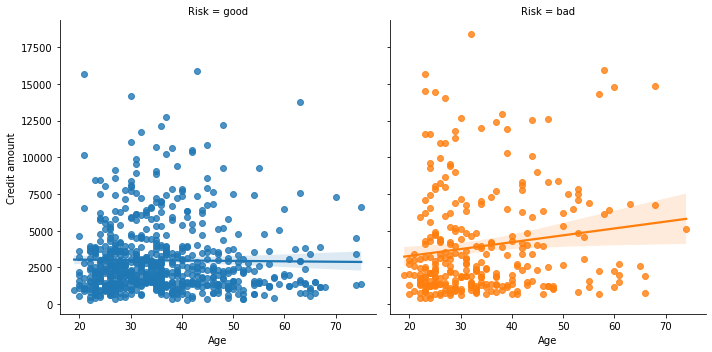

In [ ]:
sns.lmplot(x="Age", y="Credit amount", col="Risk", hue="Risk", data=cr);

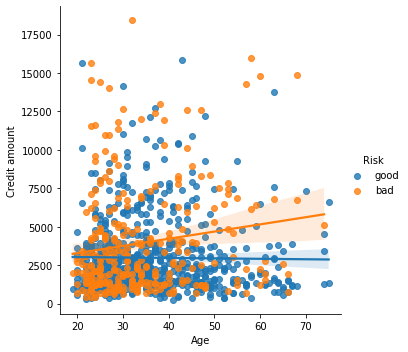

In [ ]:
sns.lmplot(x="Age", y="Credit amount", hue="Risk", data=cr);

Tendencia a solicitar empréstimo diminuiu com o passar da idade, independente do perfil.


# Agrupando Categorias

In [ ]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 118.2+ KB


**Agrupando categorias e transformando em numéricas para análises.**

In [ ]:
cr["Sex"] = cr["Sex"].map({"male":0, "female":1})
cr['Job'] = cr['Job'].map({0:0, 1:0, 2:1, 3:1})
cr["Housing"] = cr["Housing"].map({"free":0, "rent":1, "own":2})
cr['Purpose'] = cr['Purpose'].map({"radio/TV": 0, "car":1, "furniture/equipment": 2, "domestic appliances":2, "repairs":2,
                                   "education":2, "business":2, "vacation/others":2})
cr["Risk"] = cr["Risk"].map({"good":0, "bad":1})

In [ ]:
def X_OrdinalEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 2
    elif text == "rich":
        return 2
    else:
        return 0

cr["Saving accounts"] = cr["Saving accounts"].apply(X_OrdinalEncoder)
cr["Checking account"] = cr["Checking account"].apply(X_OrdinalEncoder)

In [ ]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 118.2 KB


**Transforming Age in a normal distribution**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cr['Age_normal'] = scaler.fit_transform(cr[['Age']])

# Regressão Logística: Imbalanced, Undersampling and Oversamplig

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
pip install imbalanced-learn

In [ ]:
X = cr.drop(["Risk"], axis=1)
y = cr.Risk

In [ ]:
X_ru = cr.drop(["Risk"], axis=1)
y_ru = cr.Risk

In [ ]:
X_ro = cr.drop(["Risk"], axis=1)
y_ro = cr.Risk

In [ ]:
# Random Undersampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_rus, y_rus = rus.fit_resample(X_ru, y_ru)

In [ ]:
#Random Oversampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_ros, y_ros = ros.fit_resample(X_ro, y_ro)

**Regressão Logística: Imbalanced**

In [ ]:
lr = LogisticRegression()

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

**Regressão Logística: Undersampling**

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, random_state = 1, stratify=y_rus)

In [ ]:
lr.fit(X_train_rus, y_train_rus)

LogisticRegression()

In [ ]:
y_pred_rus = lr.predict(X_test_rus)

**Regressão Logística: Oversampling**

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, random_state = 1, stratify=y_ros)

In [ ]:
lr.fit(X_train_ros, y_train_ros)

In [ ]:
y_pred_ros = lr.predict(X_test_ros)

**Roc e Auc**

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)
lr_rus_probs = lr.predict_proba(X_test_rus)
lr_ros_probs = lr.predict_proba(X_test_ros)

In [ ]:
lr_probs = lr_probs[:, 1]
lr_rus_probs = lr_rus_probs[:, 1]
lr_ros_probs = lr_ros_probs[:, 1]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_rus_auc = roc_auc_score(y_test_rus, lr_rus_probs)
lr_ros_auc = roc_auc_score(y_test_ros, lr_ros_probs)

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_rus_fpr, lr_rus_tpr, _ = roc_curve(y_test_rus, lr_rus_probs)
lr_ros_fpr, lr_ros_tpr, _ = roc_curve(y_test_ros, lr_ros_probs)

# Resultado da Regressão Logística

**Resultado: Imbalanced**

In [ ]:
accuracy_score(y_test, y_pred)

0.716

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       175
           1       0.55      0.31      0.39        75

    accuracy                           0.72       250
   macro avg       0.65      0.60      0.60       250
weighted avg       0.69      0.72      0.69       250



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0        156  19  175
1         52  23   75
All      208  42  250


In [ ]:
print('Logistic Regression Imbalanced: AUROC = %.3f' % (lr_auc))

Logistic Regression Imbalanced: AUROC = 0.742


**Resultado: Undersampling**

In [ ]:
accuracy_score(y_test_rus, y_pred_rus)

0.7066666666666667

In [ ]:
print (classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        75
           1       0.70      0.72      0.71        75

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



In [ ]:
print(pd.crosstab(y_test_rus, y_pred_rus, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        52  23   75
1        21  54   75
All      73  77  150


In [ ]:
print('Logistic Regression Undersampling: AUROC = %.3f' % (lr_rus_auc))

Logistic Regression Undersampling: AUROC = 0.776


**Resultado: Oversampling**

In [ ]:
accuracy_score(y_test_ros, y_pred_ros)

0.6485714285714286

In [ ]:
print (classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       175
           1       0.64      0.66      0.65       175

    accuracy                           0.65       350
   macro avg       0.65      0.65      0.65       350
weighted avg       0.65      0.65      0.65       350



In [ ]:
print(pd.crosstab(y_test_ros, y_pred_ros, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        111   64  175
1         59  116  175
All      170  180  350


In [ ]:
print('Logistic Regression Oversampling: AUROC = %.3f' % (lr_ros_auc))

Logistic Regression Oversampling: AUROC = 0.711


**Curva ROC e Resultado AUC**

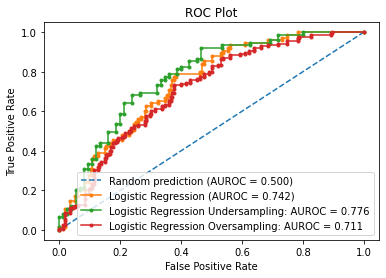

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(lr_rus_fpr, lr_rus_tpr, marker='.', label='Logistic Regression Undersampling: AUROC = %.3f' % lr_rus_auc)
plt.plot(lr_ros_fpr, lr_ros_tpr, marker='.', label='Logistic Regression Oversampling: AUROC = %.3f' % lr_ros_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()
# Show plot
plt.show()

## Resultados Finais

Os resultados considerados para a base de dados **desbalanceada, undersampling e oversampling** serão: *accuracy*, *F1 score* e os resultados da curva *ROC* e a área correspondente, a *AUC*. O *F1 score* leva em consideração a média ponderada dos resultados de *precision* e *recall*, levando em conta os resultados de *false positives* e *false negatives*, além das previsões corretas realizadas de com os *true positives*.


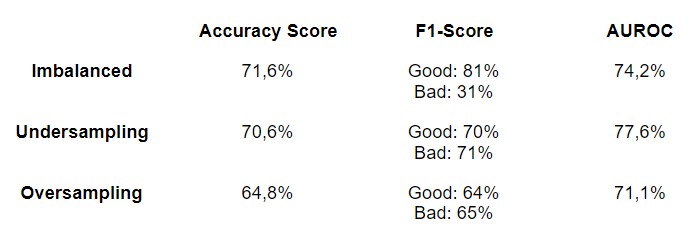

Dessa forma, podemos podemos verificar que o modelo desbalanceado está prevendo muito bem os **bons pagadores com 81%**, mas está prevendo mal os **maus pagadores com 31% de precisão**. **O melhor modelo de previsão é o do Undersampling** com **70,6% de accuracy score**, mas com um F-1 score com **70% de precisão** para os bons pagadores e **71% de precisão** para os maus pagadores. Assim, o nosso melhor modelo de previsão é o *Undersampling*, pois ele melhor prevê o bons e maus pagadores, com um accuracy score considerável. 